# Anaysis of the KuaiRec Dataset By Samy YACEF
<p align="center">
    <img width="721" alt="cover-image" src="../../img/KuaiRec.png">
</p>

## Dataset

The dataset is available at [KuaiRec](https://nas.chongminggao.top:4430/datasets/KuaiRec.zip).

We can download the dataset via a wget command:

In [ ]:
%%bash
wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
' -O KuaiRec.zip
unzip KuaiRec.zip -d ../data_final_project

--2025-05-06 12:19:02--  https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470%0A
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2a00:1450:4007:80d::2001, 142.250.75.225
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2a00:1450:4007:80d::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431964858 (412M) [application/octet-stream]
Saving to: ‘KuaiRec.zip’

     0K .......... .......... .......... .......... ..........  0% 5.61M 73s
    50K .......... .......... .......... .......... ..........  0% 15.6M 50s
   100K .......... .......... .......... .......... ..........  0% 17.5M 41s
   150K .......... .......... .......... .......... ..........  0% 18.6M 36s
   200K .......... .......... .......... .......... ..........  0% 18.7M 34s
   250K .......... .......... .......... .......... ..........  0% 18.8M 32s
  

Archive:  KuaiRec.zip
   creating: data_final_project/KuaiRec 2.0/
  inflating: data_final_project/KuaiRec 2.0/LICENSE  
  inflating: data_final_project/KuaiRec 2.0/Statistics_KuaiRec.ipynb  
   creating: data_final_project/KuaiRec 2.0/data/
  inflating: data_final_project/KuaiRec 2.0/data/big_matrix.csv  
  inflating: data_final_project/KuaiRec 2.0/data/item_categories.csv  
  inflating: data_final_project/KuaiRec 2.0/data/item_daily_features.csv  
  inflating: data_final_project/KuaiRec 2.0/data/kuairec_caption_category.csv  
  inflating: data_final_project/KuaiRec 2.0/data/small_matrix.csv  
  inflating: data_final_project/KuaiRec 2.0/data/social_network.csv  
  inflating: data_final_project/KuaiRec 2.0/data/user_features.csv  
   creating: data_final_project/KuaiRec 2.0/figs/
  inflating: data_final_project/KuaiRec 2.0/figs/KuaiRec.png  
  inflating: data_final_project/KuaiRec 2.0/figs/colab-badge.svg  
  inflating: data_final_project/KuaiRec 2.0/loaddata.py  


In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Exploratory Data Analysis
In this series of notebooks, we will perform an exploratory data analysis (EDA) on the KuaiRec dataset. The goal of this EDA is to understand the structure and content of the dataset, as well as to identify any potential issues or areas for further investigation.

In this first notebook, we will focus on the big matrix of interaction of the dataset.

In [2]:
interactions = pd.read_csv("../data_final_project/KuaiRec 2.0/data/small_matrix.csv")

In [11]:
#print(interactions[interactions["video_id"] == 4930].head(10))
print(len(interactions[interactions["user_id"] == 19]))

3313


In [7]:
interactions[interactions["user_id"] == 169].head(10)

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
92756,169,6778,3040,5206,2020-07-05 08:53:06.676,20200705.0,1.593910e+09,0.583942
92757,169,5288,0,14900,2020-07-05 12:50:27.451,20200705.0,1.593925e+09,0.000000
92758,169,1911,0,10011,2020-07-05 13:21:47.146,20200705.0,1.593927e+09,0.000000
92759,169,3647,9871,11967,2020-07-05 14:06:46.401,20200705.0,1.593929e+09,0.824852
92760,169,6812,1523,10728,2020-07-05 14:10:26.686,20200705.0,1.593929e+09,0.141965
92761,169,166,9890,5600,2020-07-05 14:40:30.187,20200705.0,1.593931e+09,1.766071
92762,169,5291,8219,6767,2020-07-05 14:42:01.74,20200705.0,1.593931e+09,1.214571
92763,169,183,11567,6100,2020-07-05 14:54:14.528,20200705.0,1.593932e+09,1.896230
92764,169,171,332,5267,2020-07-05 14:58:27.708,20200705.0,1.593932e+09,0.063034
92765,169,153,6077,11883,2020-07-05 15:22:59.437,20200705.0,1.593934e+09,0.511403


In [4]:
#sparse_matrix = sparse.csr_matrix(interactions)

We will try to answer the following questions:

- What are the data types?
- How many unique users and unique videos?
- Are there timestamps, and if so, what is their range?
- How many interactions are there in the data?
- How many interactions are there per user?
- How many interactions are there per item?
- What is the distribution of the interactions?
- What is the distribution of the interactions per user?
- What is the distribution of the interactions per item?
- What is the distribution of the interactions per hour in a day (weekdays)?
- What is the distribution of the interactions per hour in a day (weekends)?
- What are the most popular items?
- Who are the most active users? What are their characteristics?
- How many users/items have very few interactions ?

###  Data Quality & Missing Values

We will try to check for missing values, duplicates, and other data quality issues, like impossible values, negative timestamps negative watch_ratio, video_duration, play_duration.

In [ ]:
# removing the rows with missing values
interactions = interactions.dropna()
# removing the duplicates
interactions = interactions.drop_duplicates()
# removing the rows with negative timestamps, watch_ratio, play_duration or watch_duration
interactions = interactions[interactions["watch_ratio"] >= 0]
interactions = interactions[interactions["play_duration"] >= 0]
interactions = interactions[interactions["watch_duration"] >= 0]
interactions = interactions[interactions["timestamp"] >= 0]

In [5]:
interactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 11564987 entries, 0 to 12530805
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   video_id        int64  
 2   play_duration   int64  
 3   video_duration  int64  
 4   time            object 
 5   date            int64  
 6   timestamp       float64
 7   watch_ratio     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5 GB


### Basic Statistics & Distributions

Try to compute the basic statistics and distributions of the data.

#### Interactions per User

In [7]:
unique_users = np.unique(interactions["user_id"]).shape[0]
unique_videos = np.unique(interactions["video_id"]).shape[0]
print("There are {} unique users and {} unique videos in the dataset.".format(unique_users, unique_videos))

There are 7176 unique users and 10728 unique videos in the dataset.


The average number of interactions per user is 1611.62
The median number of interactions per user is 1723.00
The maximum number of interactions per user is 15283
The minimum number of interactions per user is 94


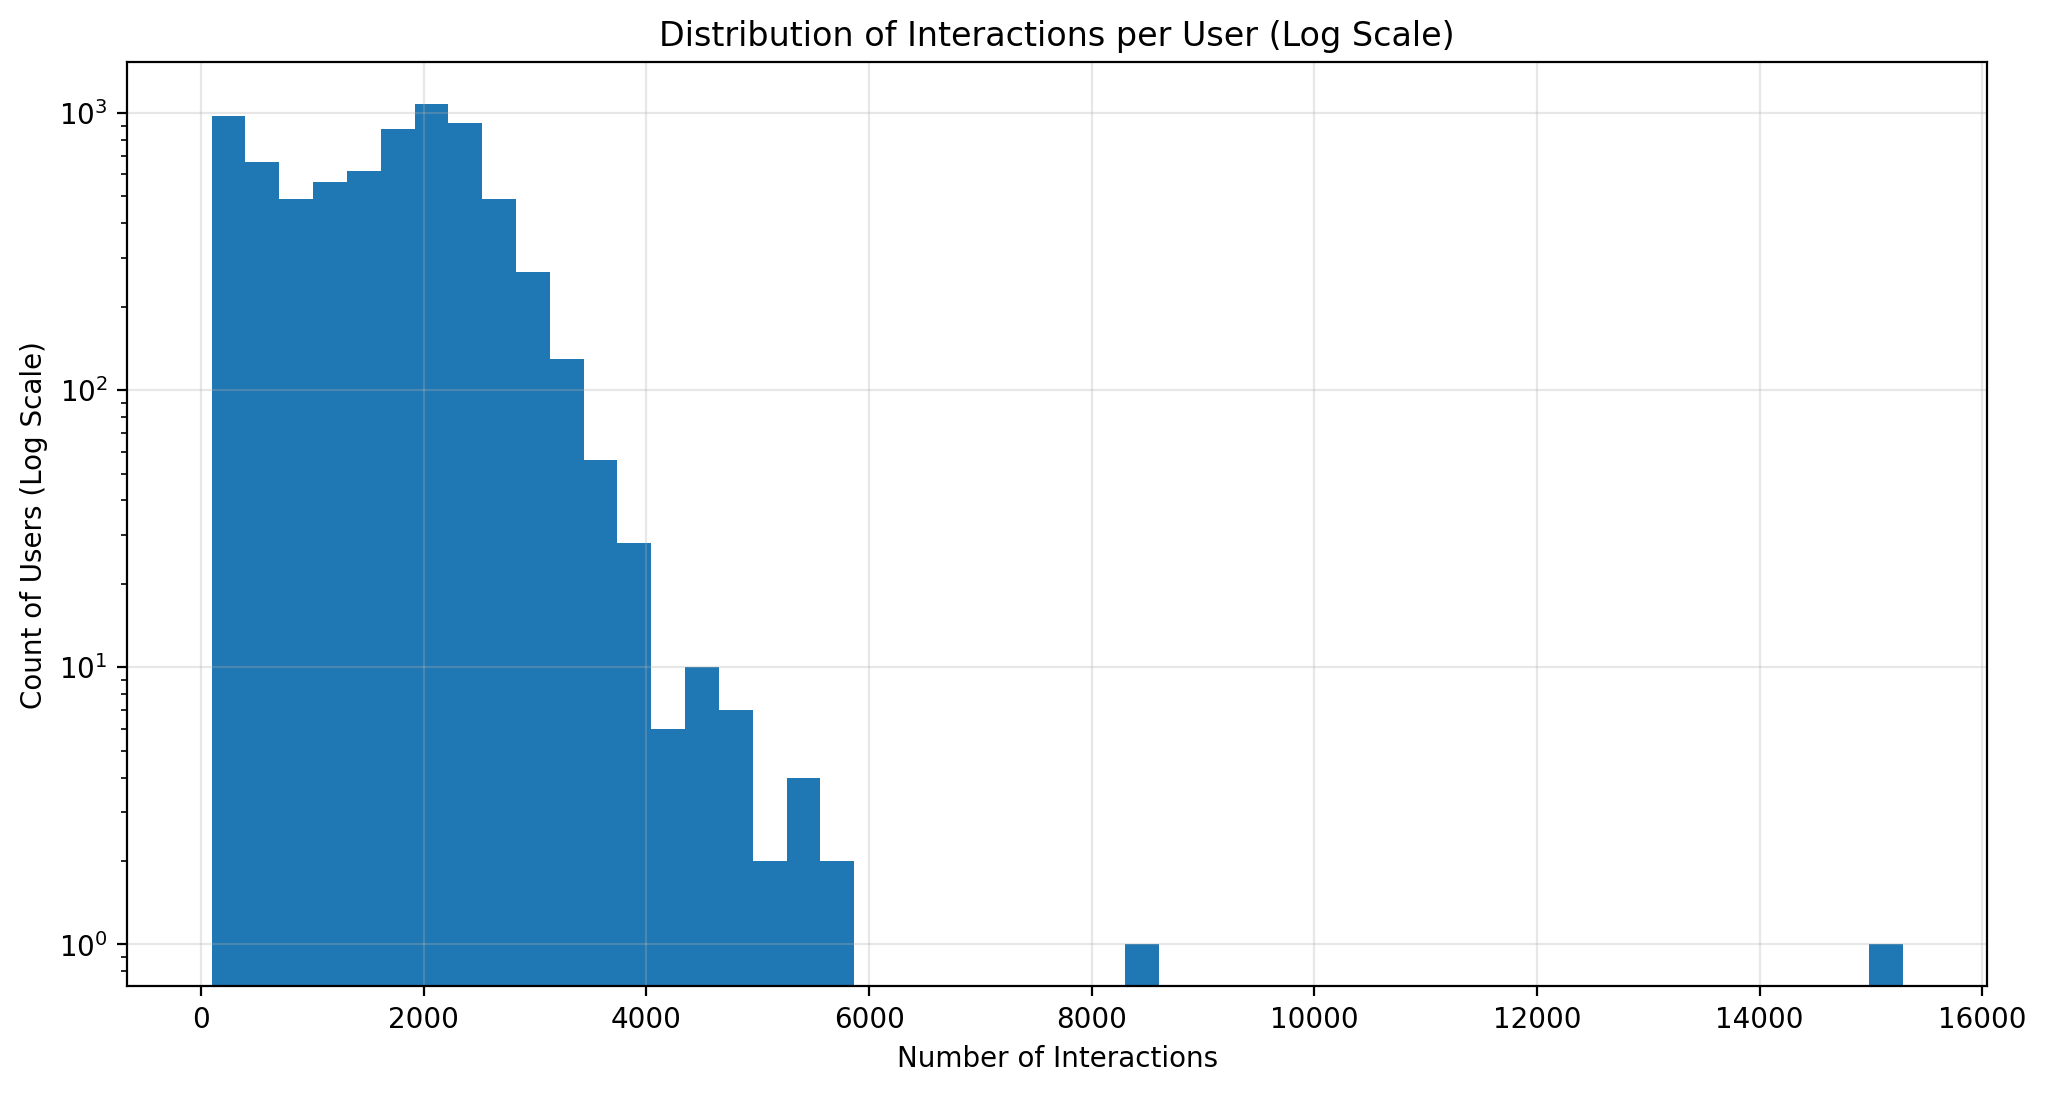

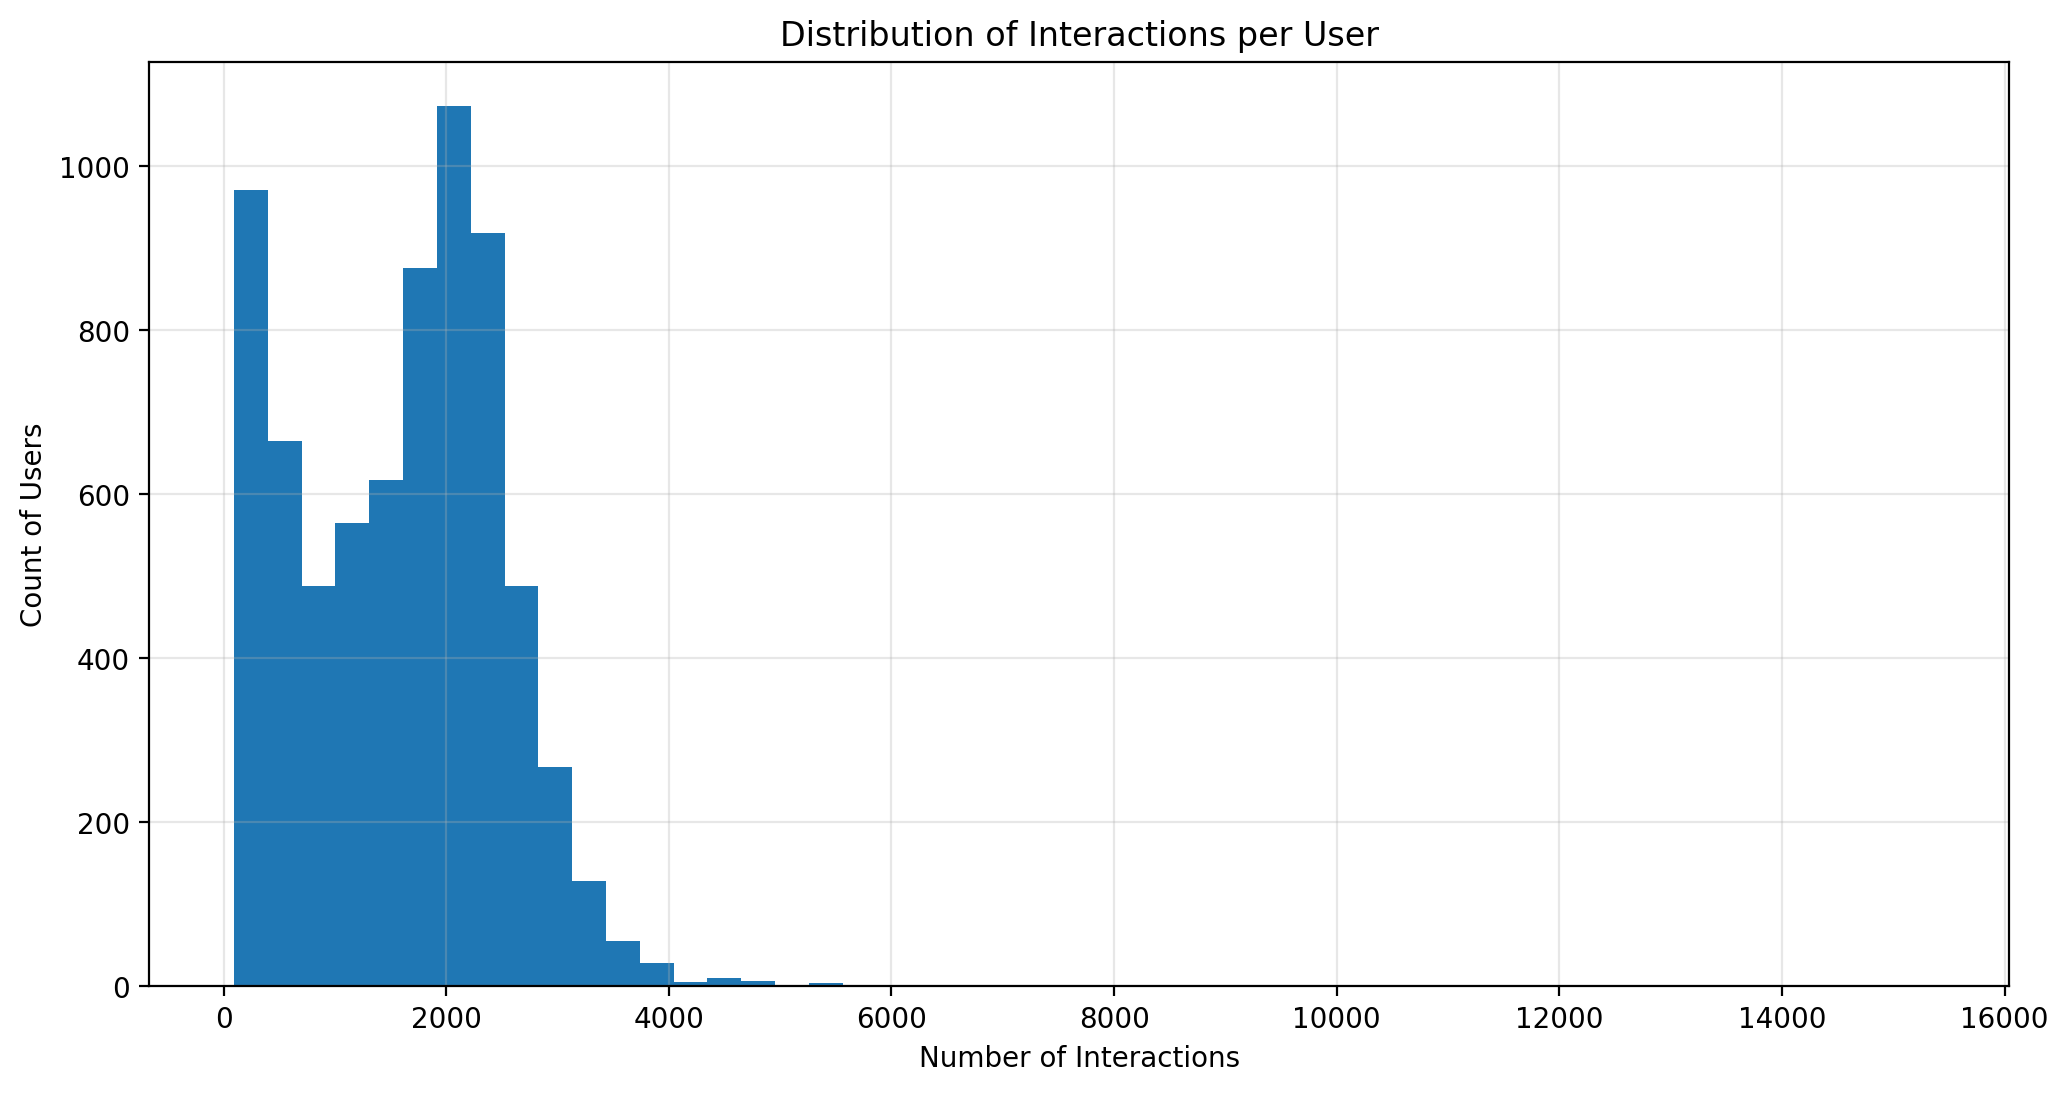

In [ ]:
user_counts = interactions["user_id"].value_counts()
avg_interactions = user_counts.mean()
print("The average number of interactions per user is {:.2f}".format(avg_interactions))
median_interactions = user_counts.median()
print("The median number of interactions per user is {:.2f}".format(median_interactions))
max_interactions = user_counts.max()
print("The maximum number of interactions per user is {}".format(max_interactions))
min_interactions = user_counts.min()
print("The minimum number of interactions per user is {}".format(min_interactions))

plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()


The average number of interactions per item is 1078.02
The median number of interactions per item is 228.00
The maximum number of interactions per item is 24173
The minimum number of interactions per item is 1


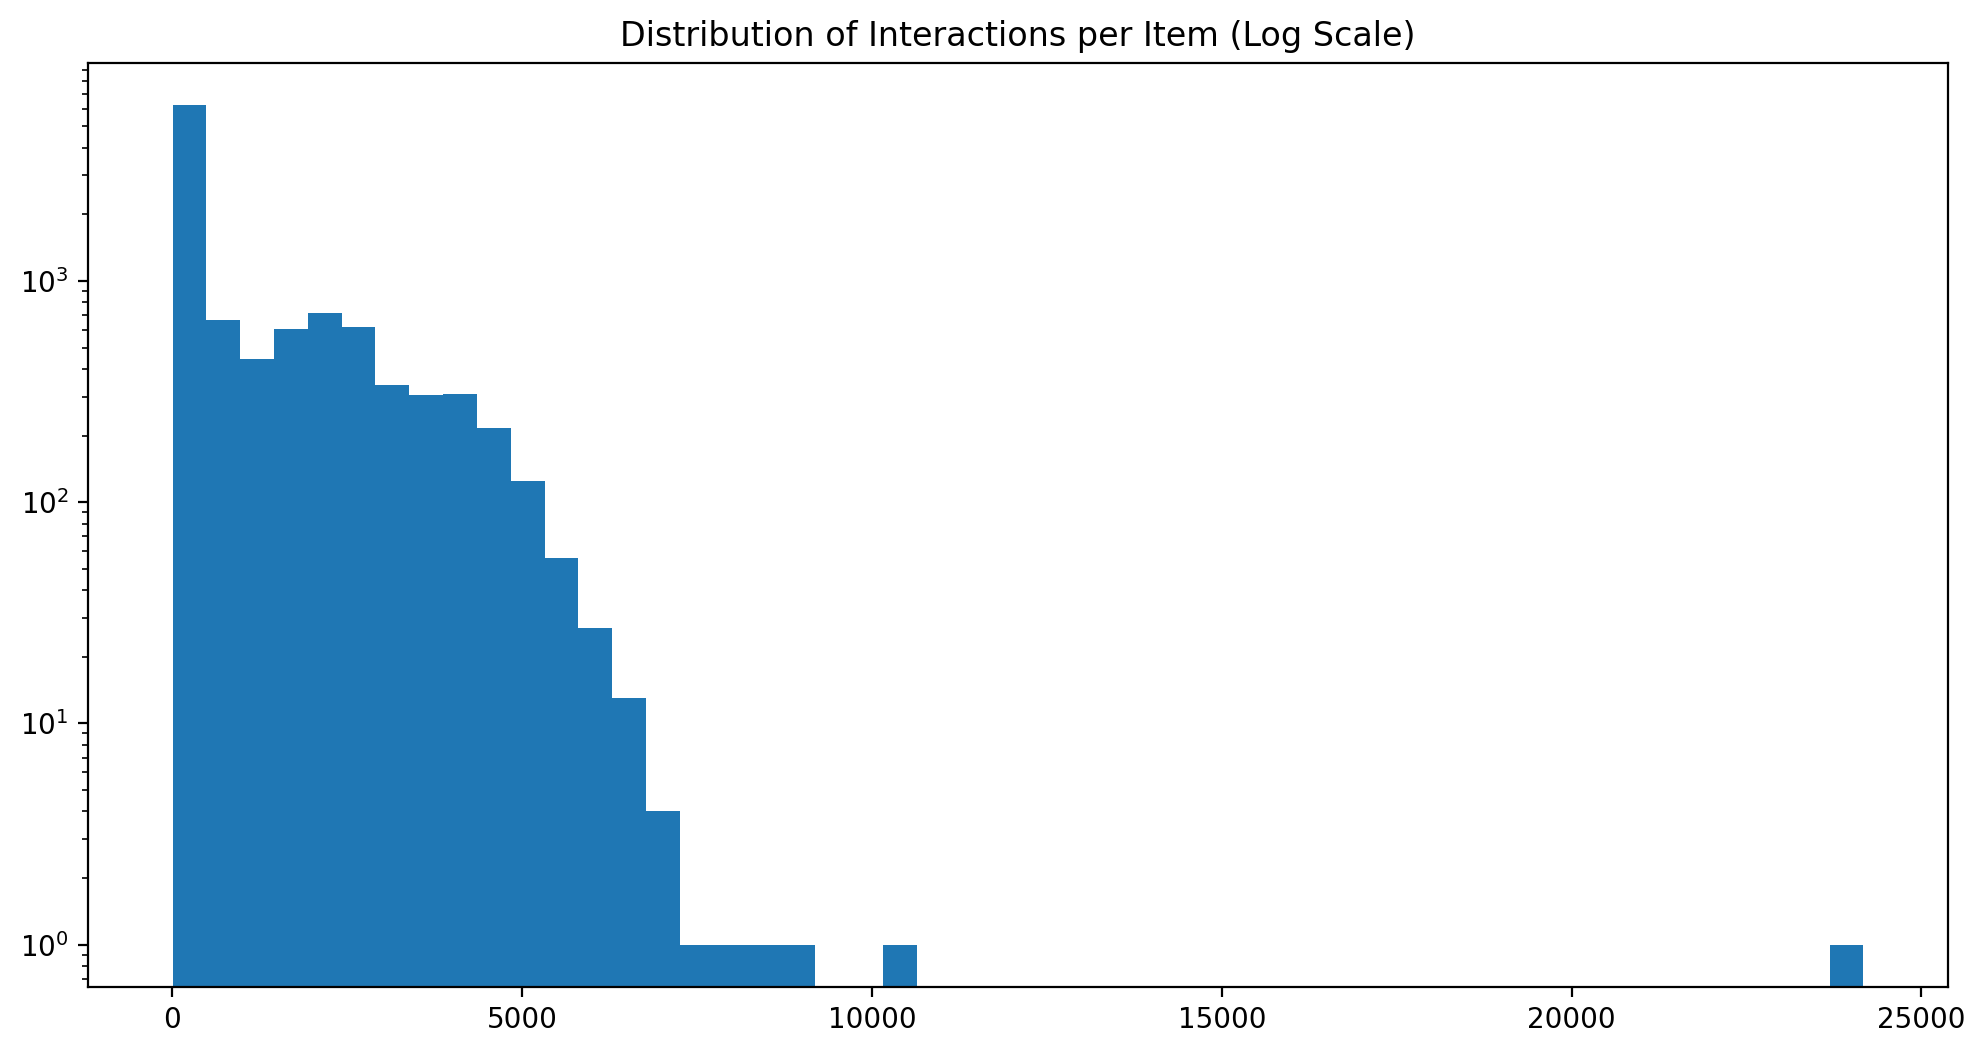

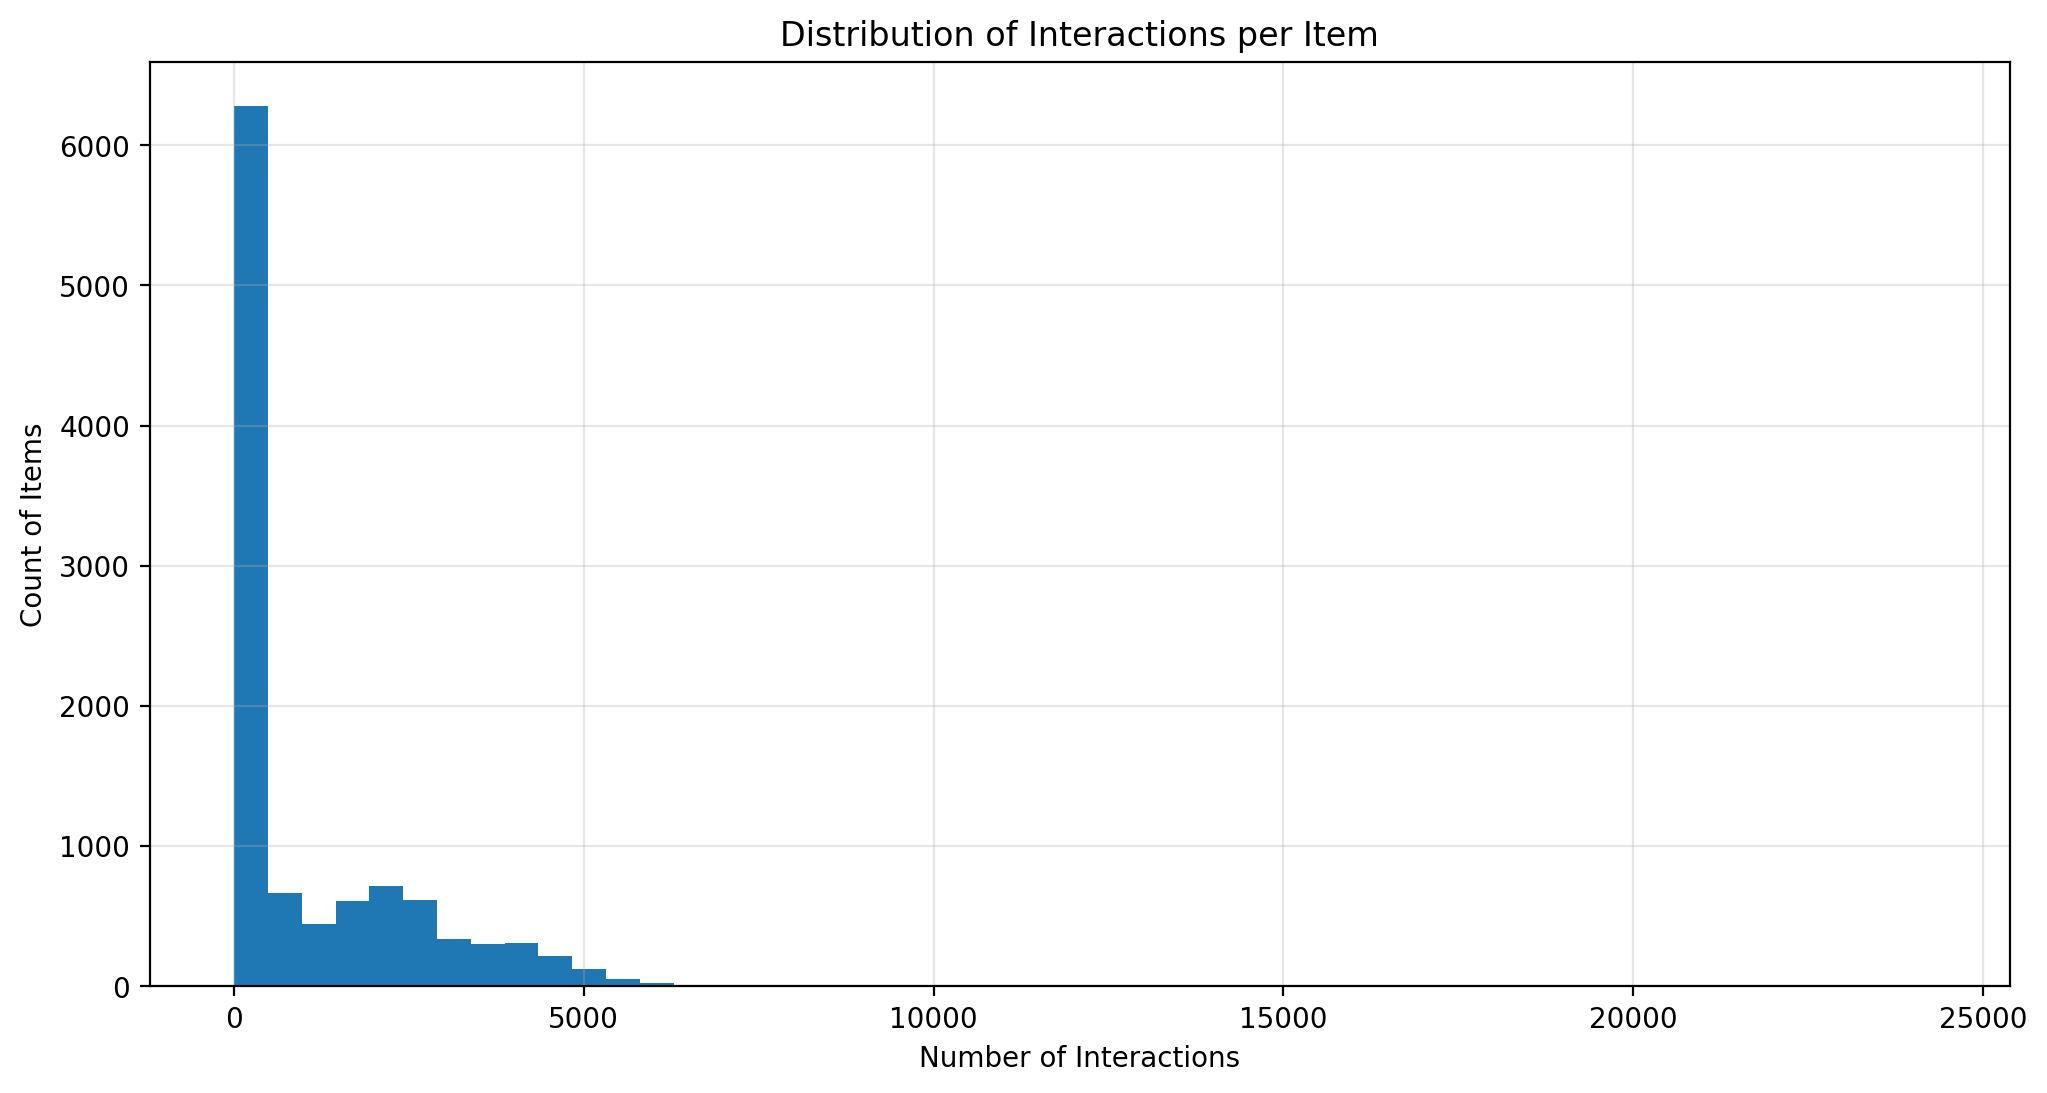

In [ ]:
item_counts = interactions["video_id"].value_counts()
avg_item_interactions = item_counts.mean()
print("The average number of interactions per item is {:.2f}".format(avg_item_interactions))
median_item_interactions = item_counts.median()
print("The median number of interactions per item is {:.2f}".format(median_item_interactions))
max_item_interactions = item_counts.max()
print("The maximum number of interactions per item is {}".format(max_item_interactions))
min_item_interactions = item_counts.min()
print("The minimum number of interactions per item is {}".format(min_item_interactions))

plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

### Temporal Analysis

Let's see the distribution of the interactions over time.

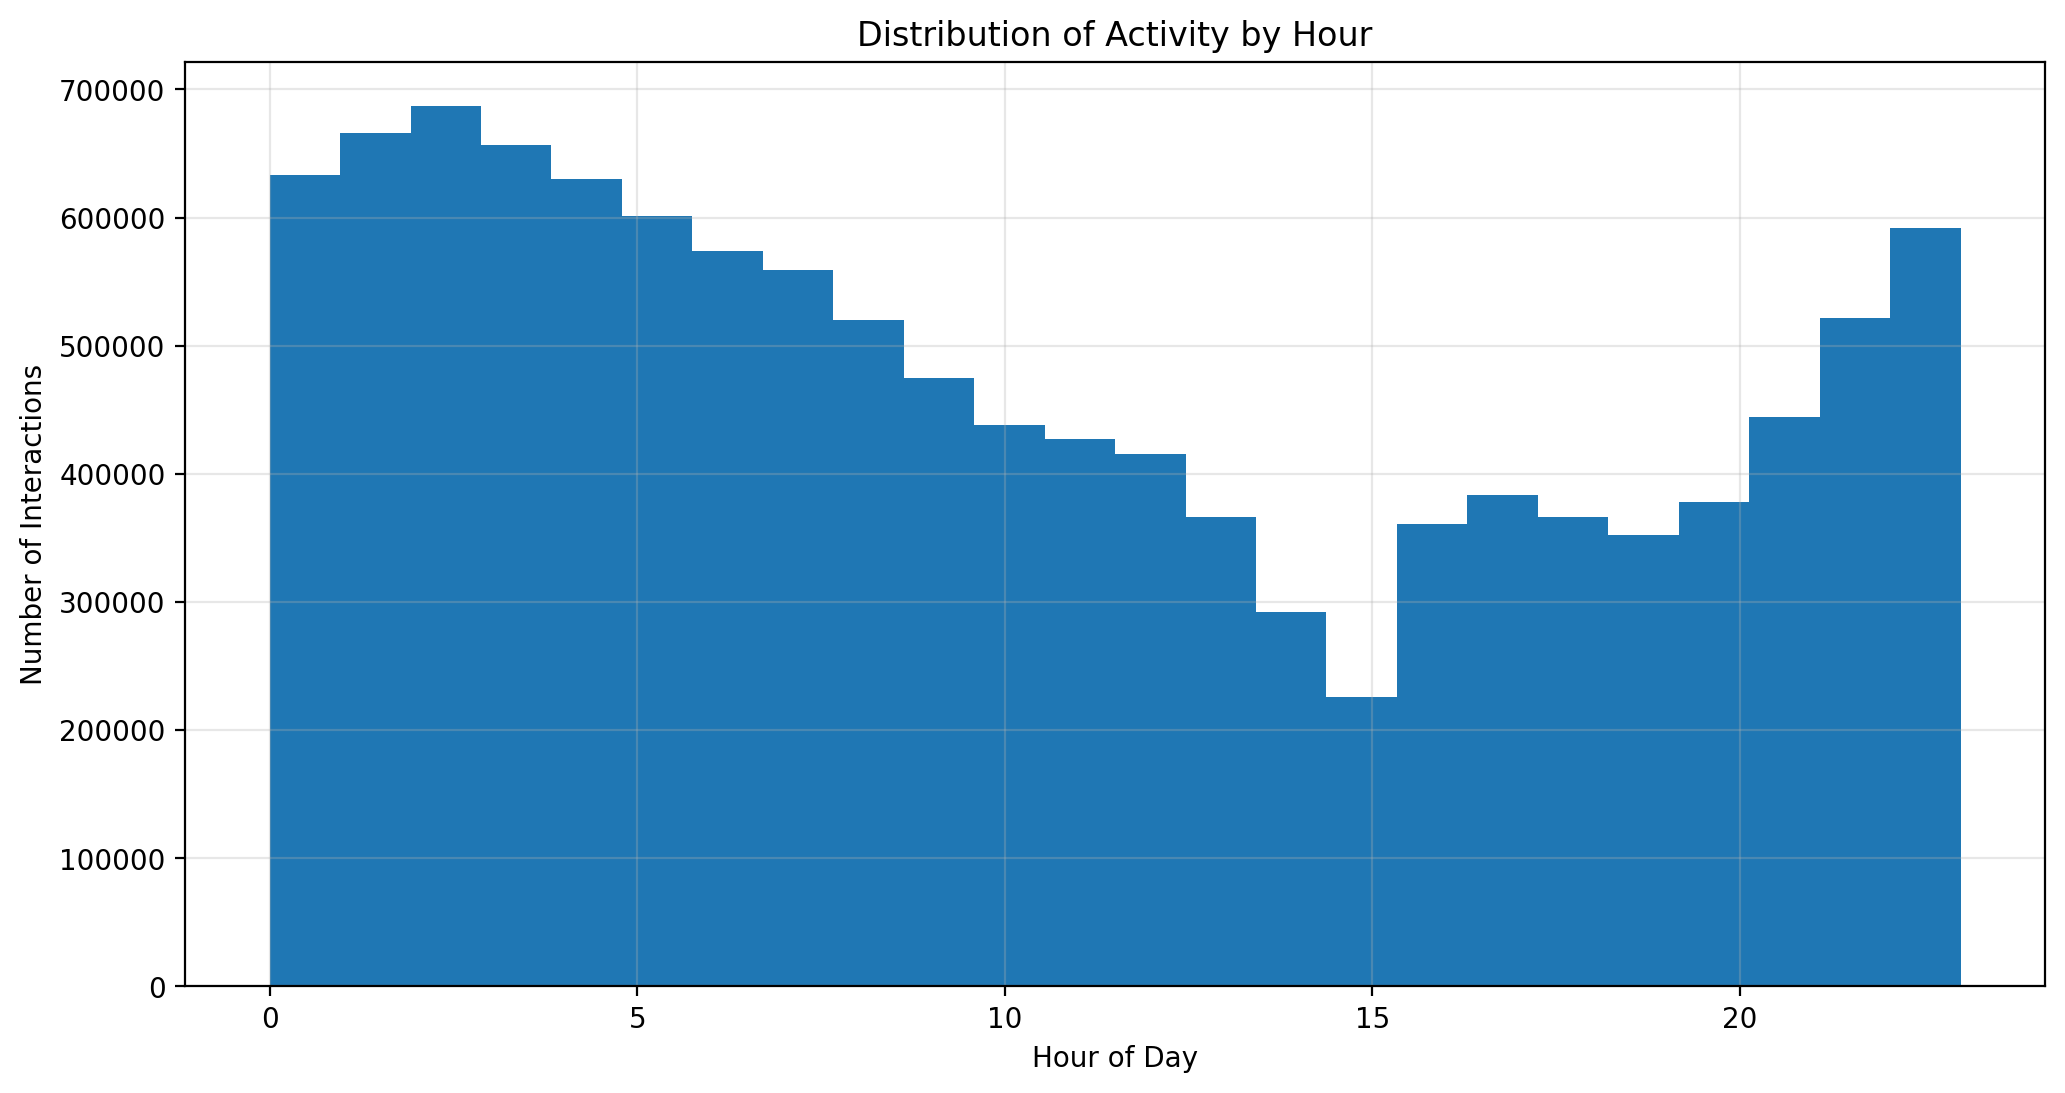

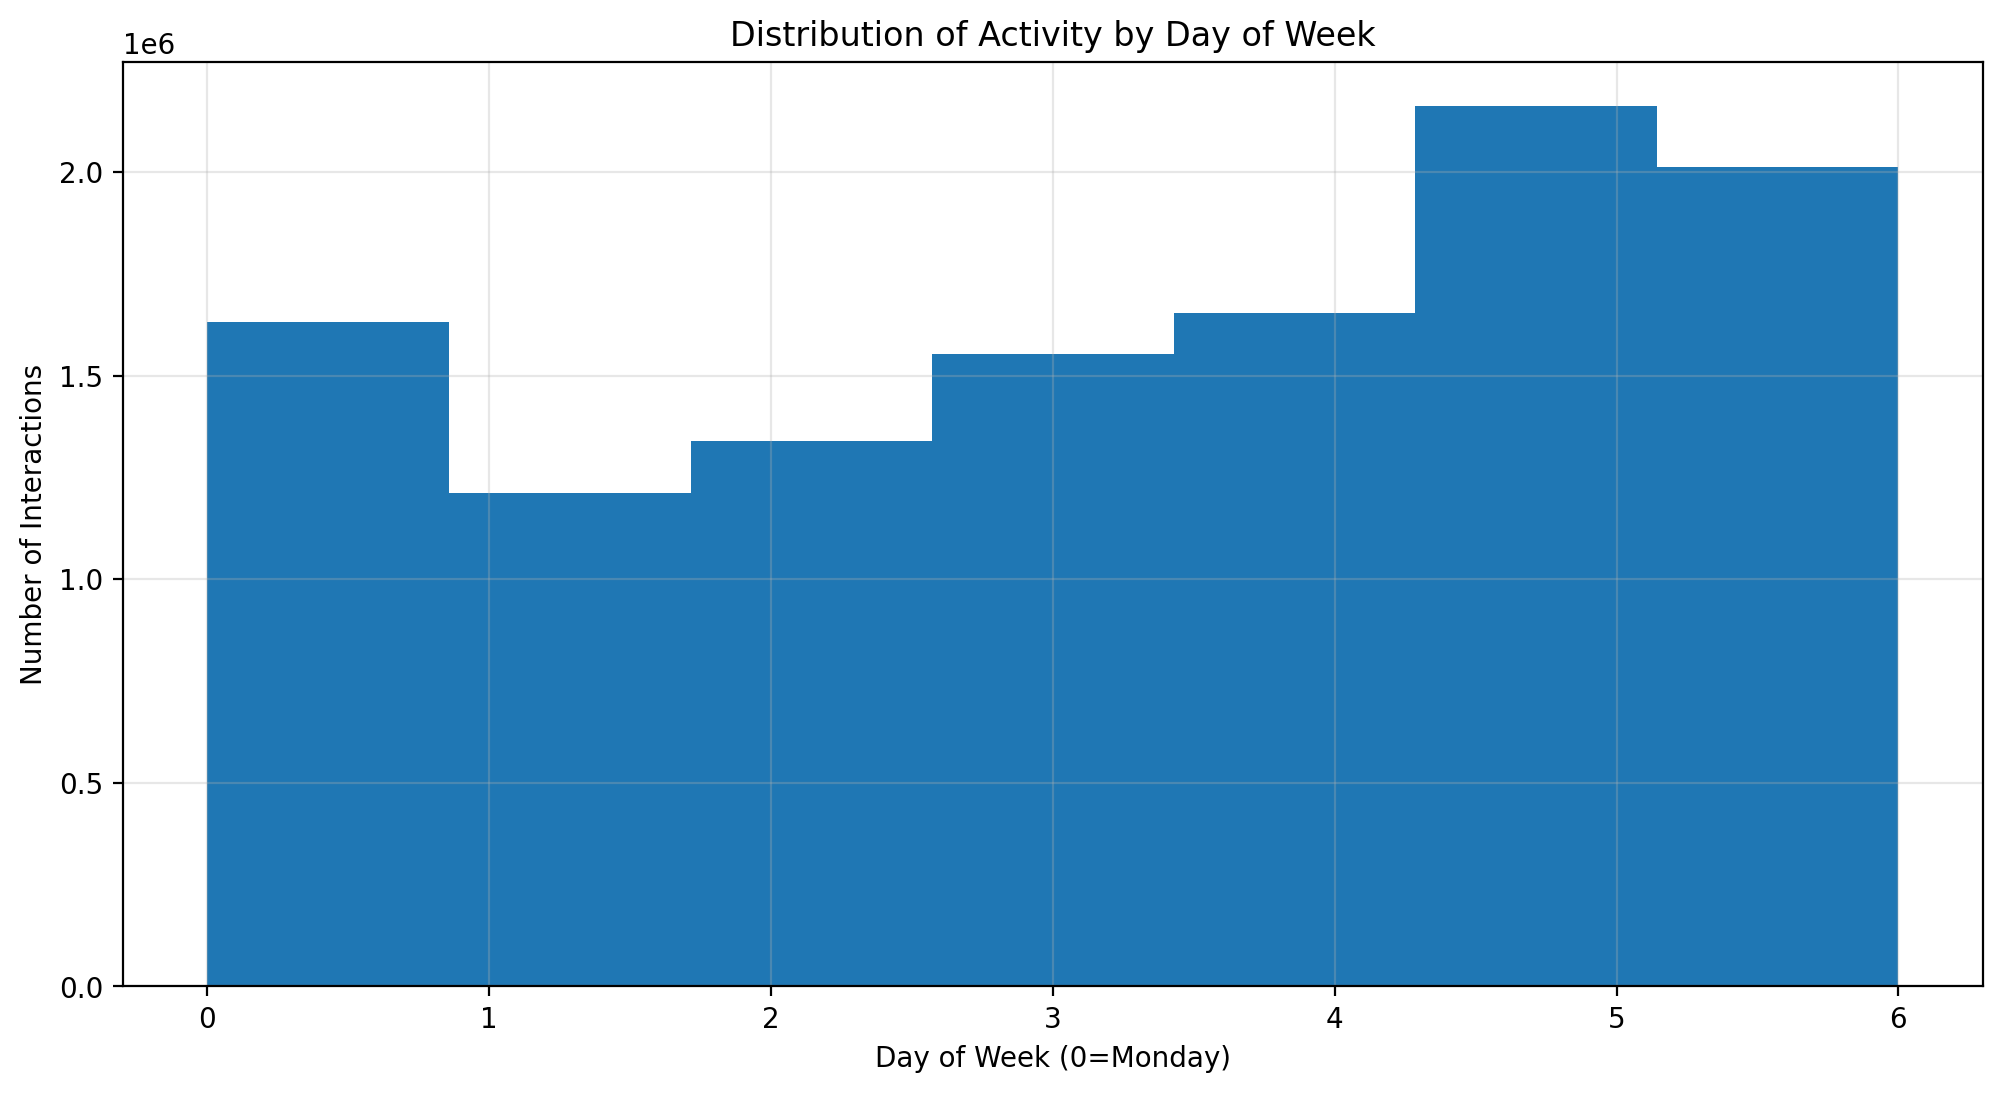

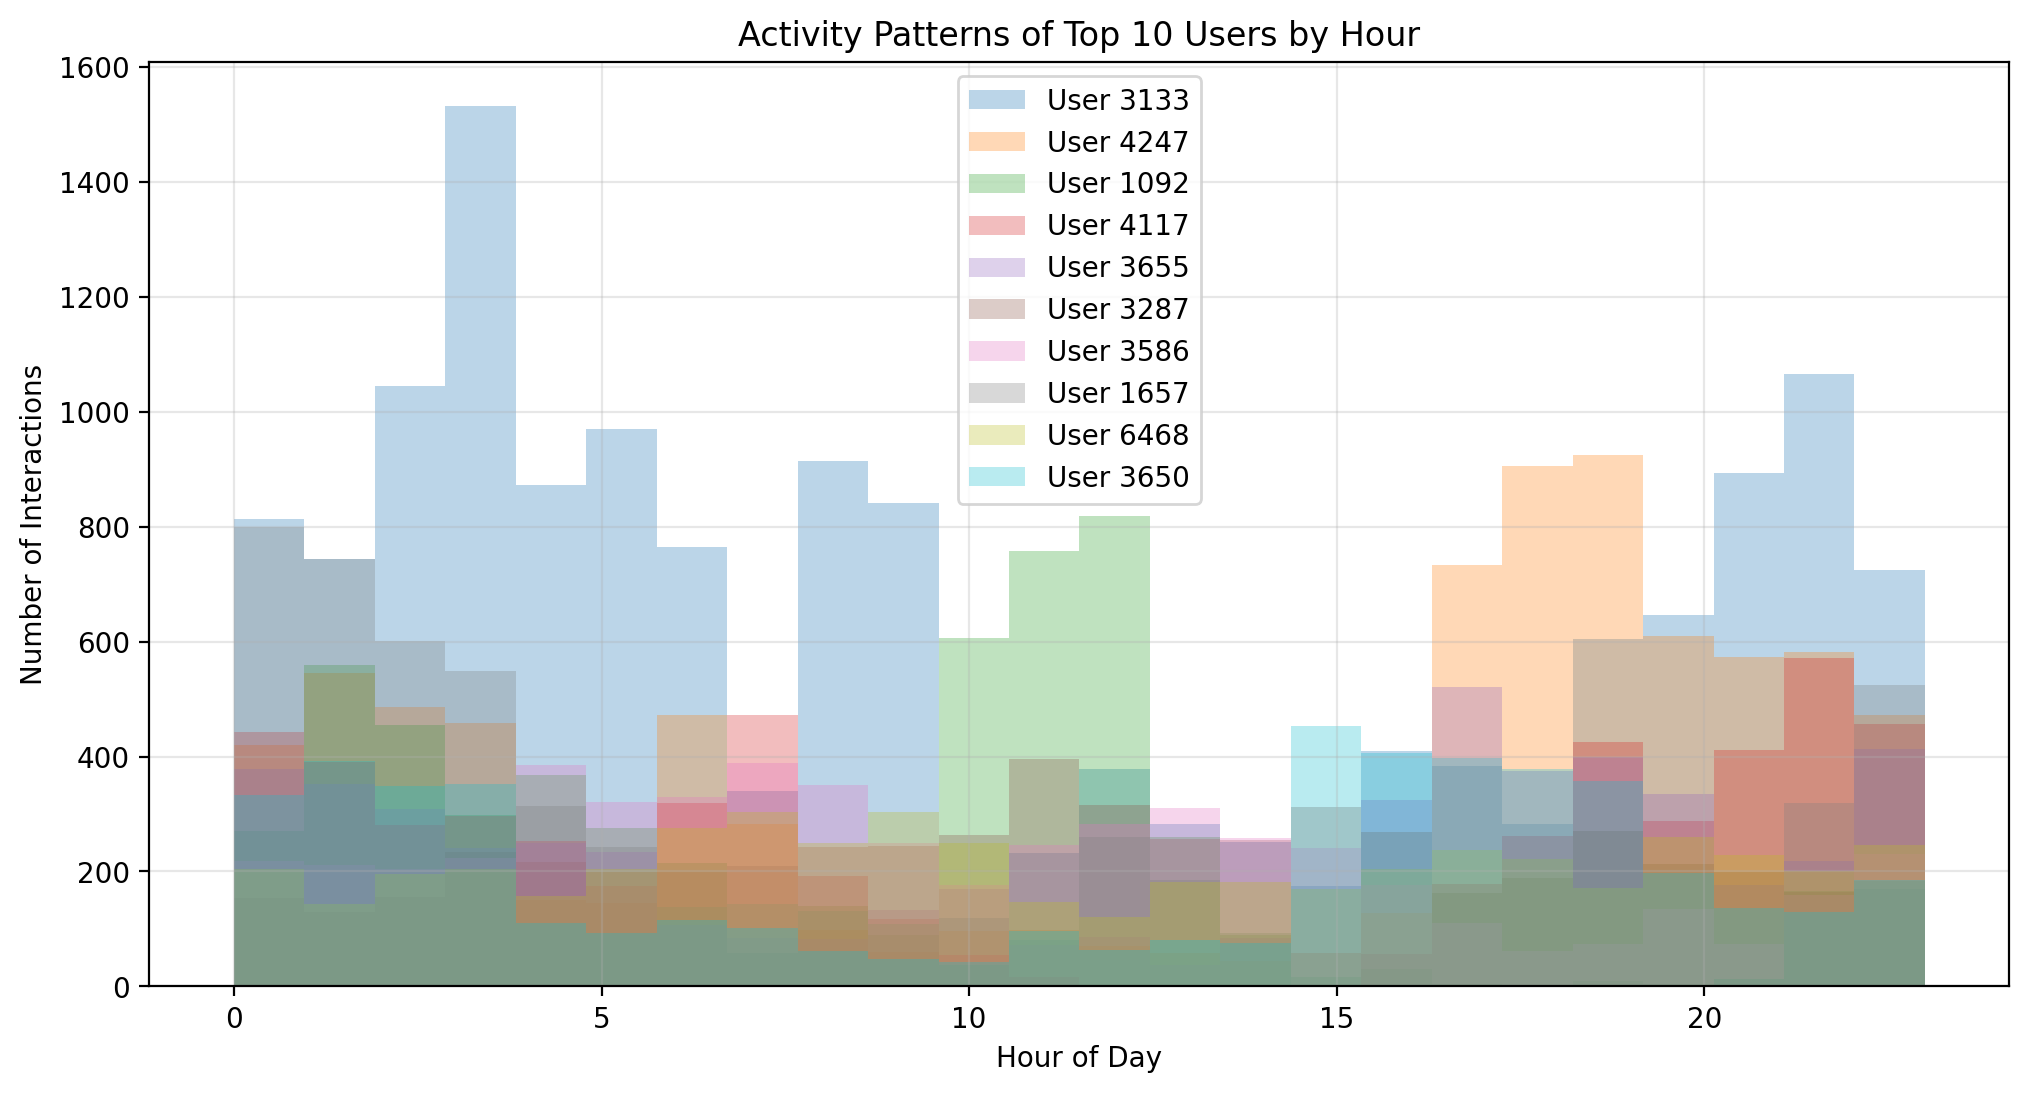


Peak Usage Hours:
Hour 2:00 - 686678 interactions
Hour 1:00 - 666058 interactions
Hour 3:00 - 656852 interactions

Peak Usage Days:
Saturday - 2161139 interactions
Sunday - 2013417 interactions
Friday - 1654813 interactions


In [ ]:
# Convert timestamp to datetime
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)

interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

# Plot activity over time
plt.figure(figsize=(12, 6))
plt.hist(interactions["hour"], bins=24)
plt.title("Distribution of Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Plot activity by day of week
plt.figure(figsize=(12, 6))
plt.hist(interactions["day"], bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Get top 10 most active users
top_users = interactions["user_id"].value_counts().head(10).index

# Plot activity patterns for top users
plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = interactions[interactions["user_id"] == user]
    plt.hist(user_data["hour"], bins=24, alpha=0.3, label=f"User {user}")
plt.title("Activity Patterns of Top 10 Users by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find peak usage times
hourly_activity = interactions.groupby("hour").size()
peak_hours = hourly_activity.nlargest(3)

print("\nPeak Usage Hours:")
for hour, count in peak_hours.items():
    print(f"Hour {hour}:00 - {count} interactions")

daily_activity = interactions.groupby("day").size()
peak_days = daily_activity.nlargest(3)

print("\nPeak Usage Days:")
for day, count in peak_days.items():
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    print(f"{days[int(day)]} - {count} interactions")

In [13]:
interactions['timestamp']

0           1.593879e+09
1           1.593879e+09
2           1.593879e+09
3           1.593880e+09
4           1.593881e+09
                ...     
12530801    1.599290e+09
12530802    1.599290e+09
12530803    1.599304e+09
12530804    1.599304e+09
12530805    1.599312e+09
Name: timestamp, Length: 11564987, dtype: float64

### Analysis of the watch ratio

In this data set, the only indicator of the interaction is the watch ratio. The watch ratio is the ratio of the time watched to the total time of the video. We need to study the distribution of the watch ratio in order to understand the behavior of the users. The watch ratio is a continuous variable that start at 0. We can use histograms to visualize the distribution of the watch ratio.

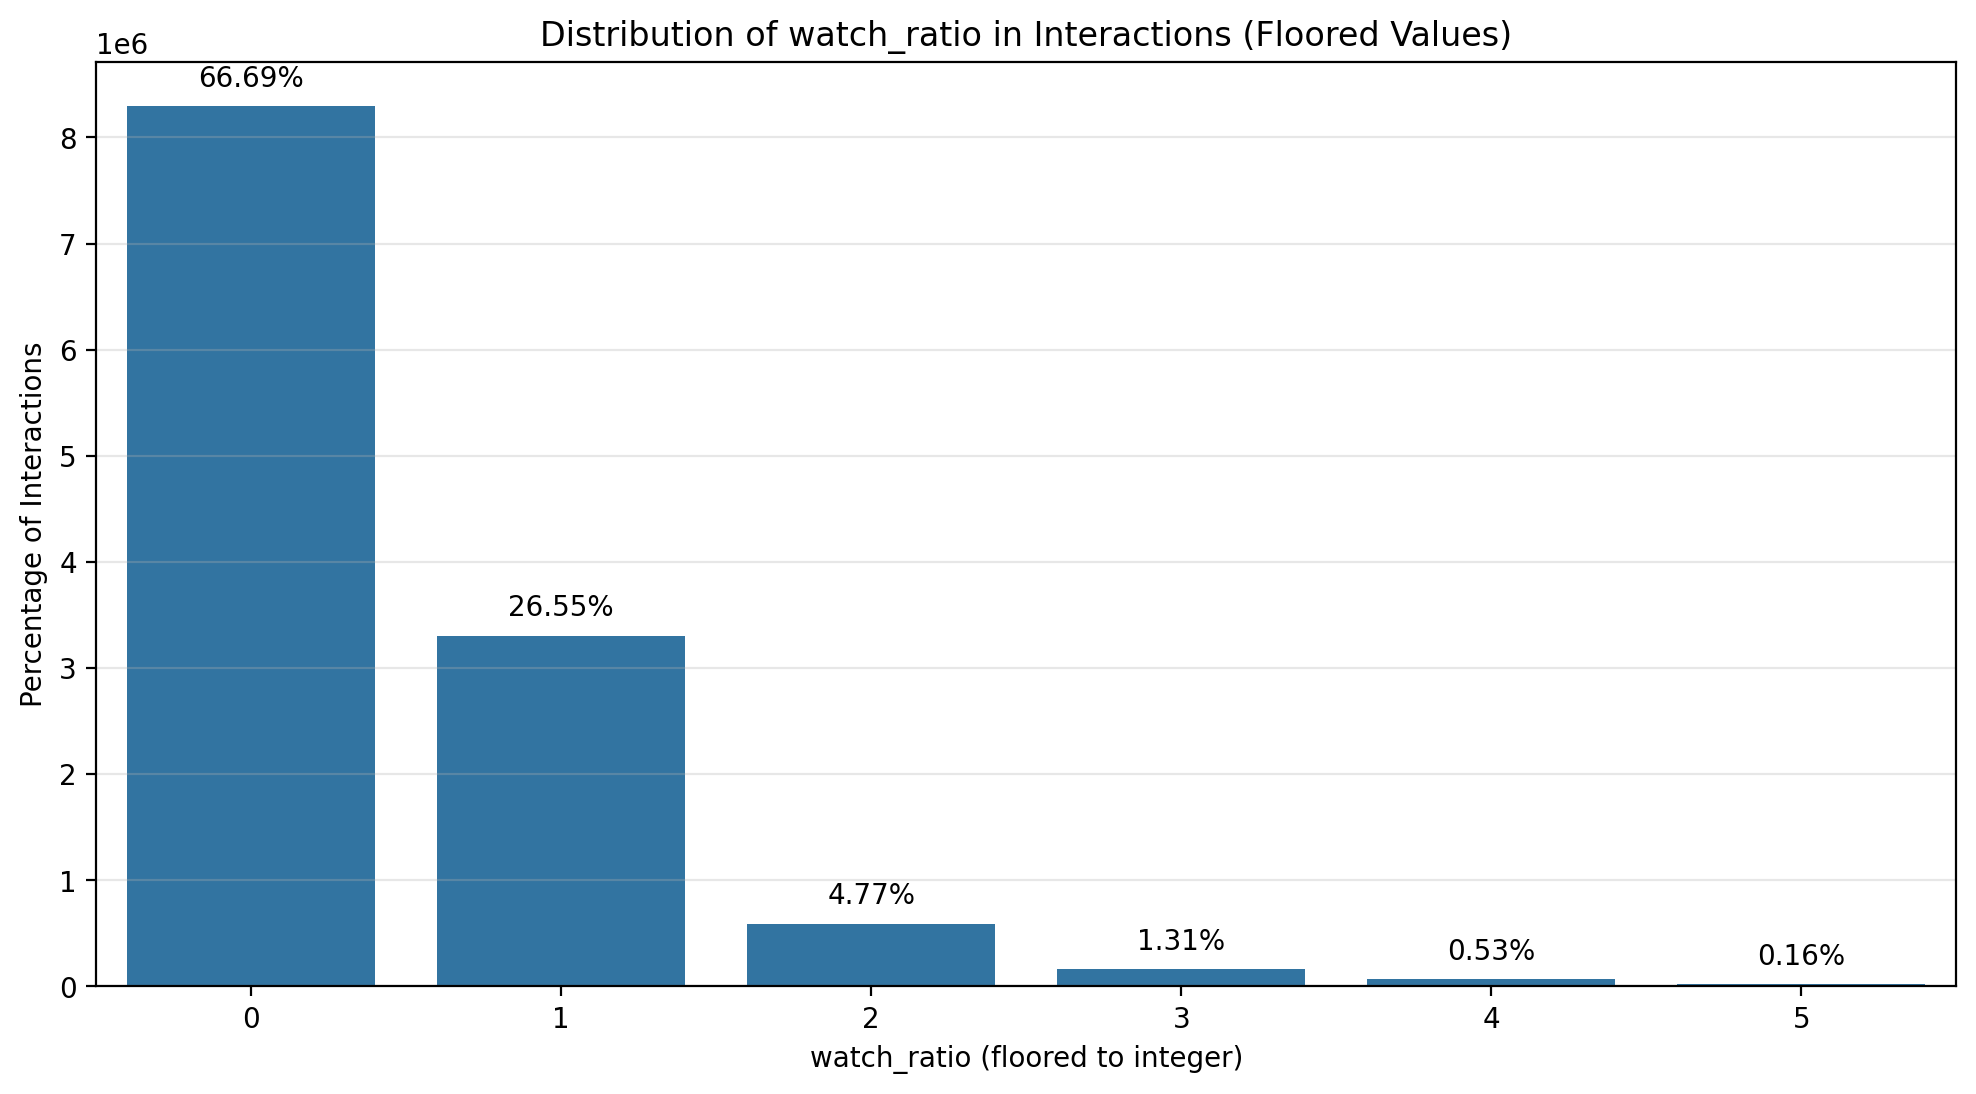

Watch Ratio Statistics:
count    1.253081e+07
mean     9.445059e-01
std      1.674601e+00
min      0.000000e+00
25%      3.148246e-01
50%      7.234710e-01
75%      1.177644e+00
max      5.734571e+02
Name: watch_ratio, dtype: float64
Number of interactions with watch_ratio > 1:
4237441
Number of interactions with watch_ratio < 0.1:
1112309


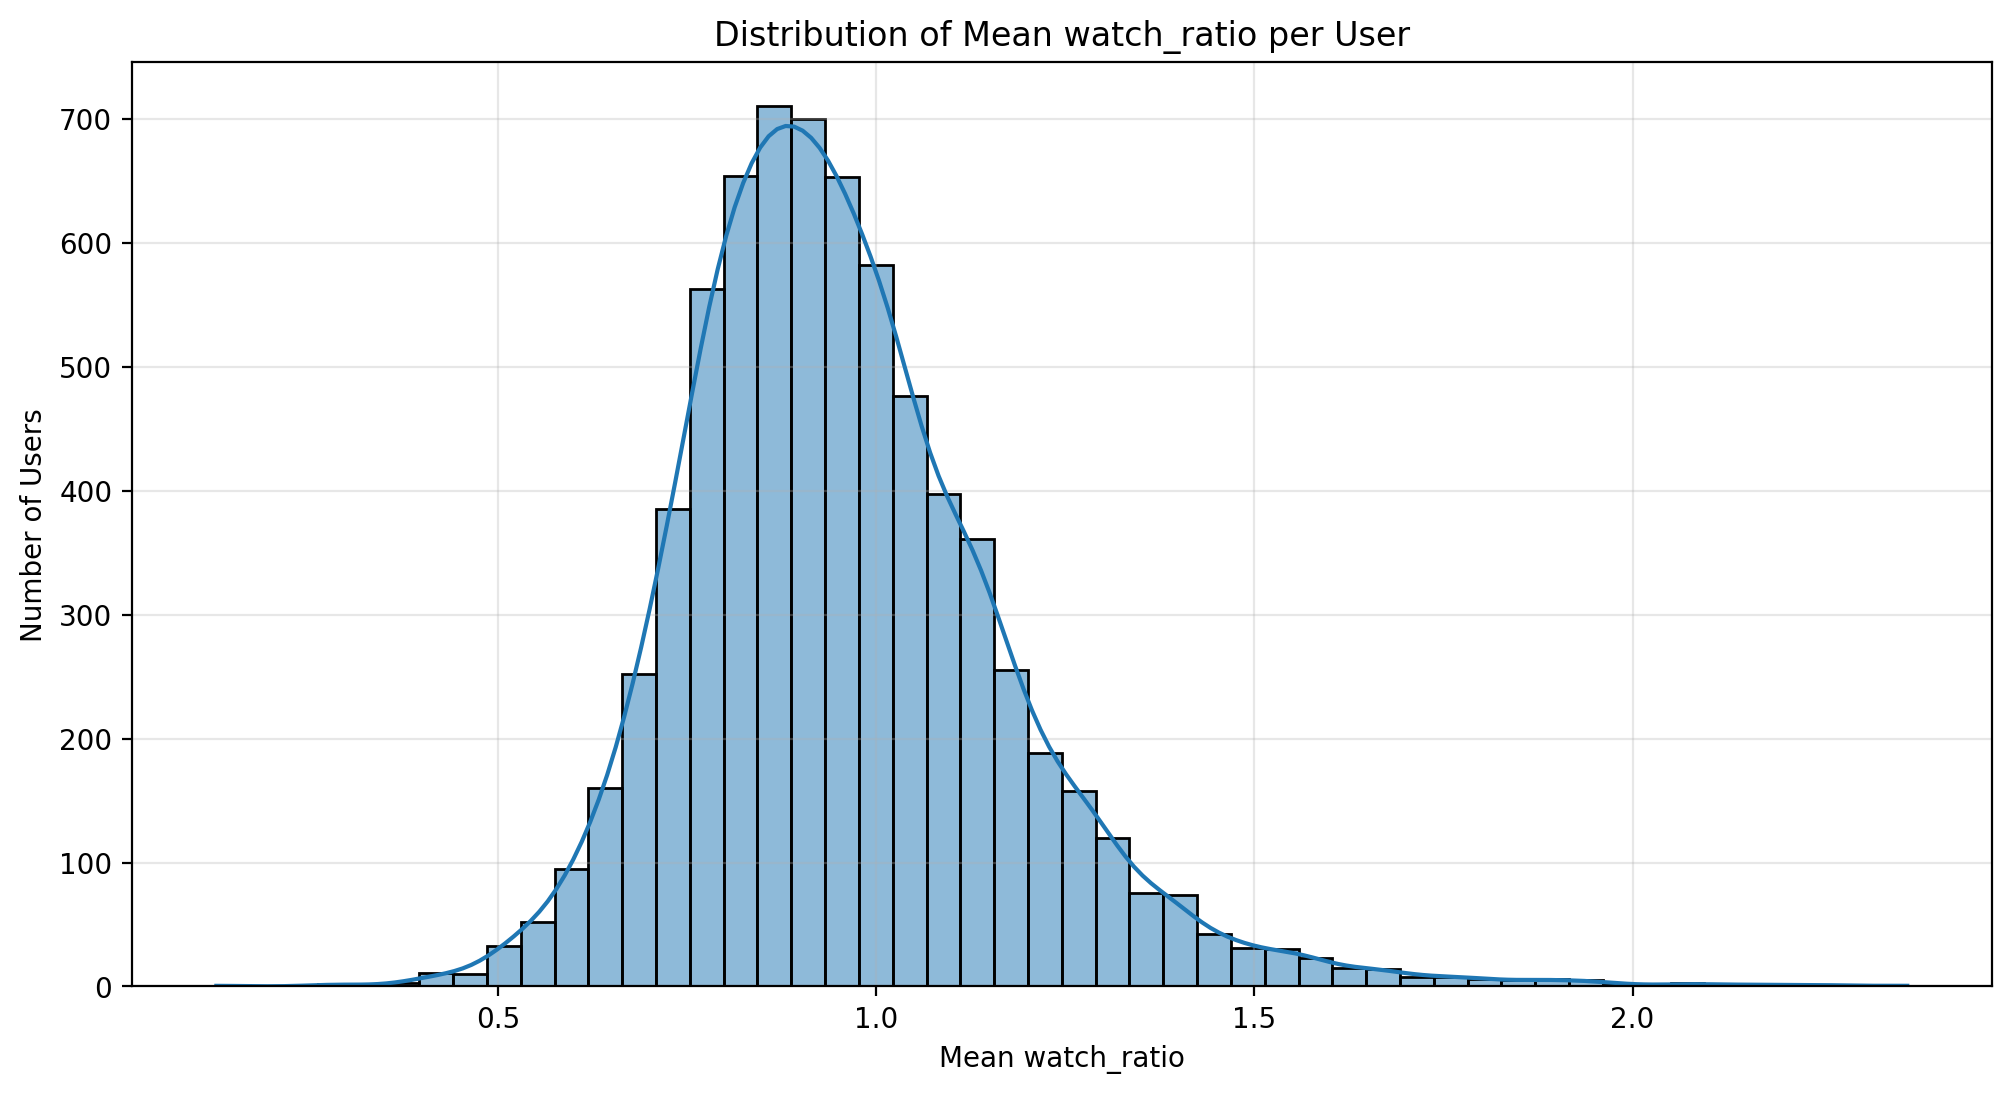

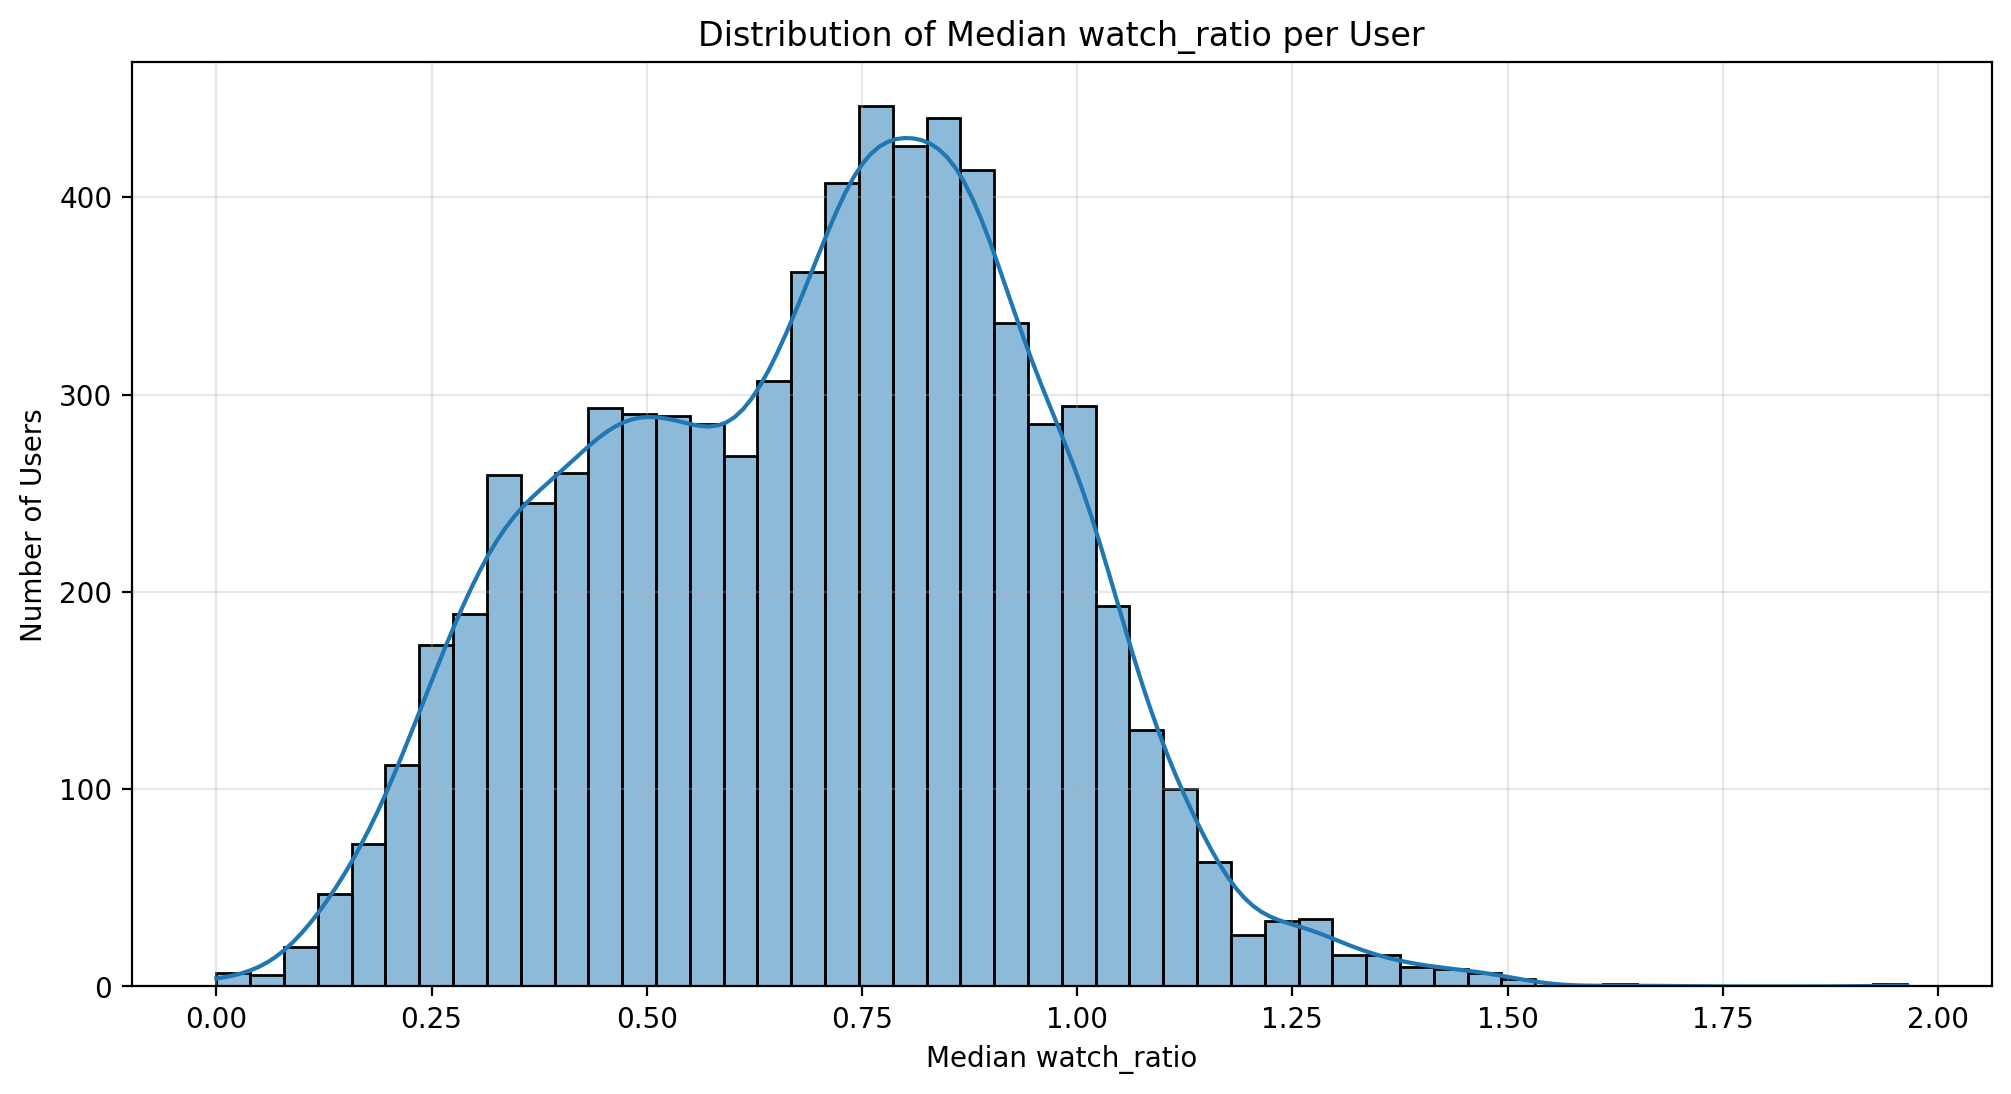

User Mean watch_ratio Statistics:
count    7176.000000
mean        0.956708
std         0.214356
min         0.127526
25%         0.814186
50%         0.930047
75%         1.070463
max         2.363279
Name: mean, dtype: float64

User Median watch_ratio Statistics:
count    7176.000000
mean        0.691581
std         0.261914
min         0.000000
25%         0.486401
50%         0.719963
75%         0.881249
max         1.964421
Name: median, dtype: float64


In [ ]:
plt.figure(figsize=(12, 6))
discrete_ratios = (interactions[interactions["watch_ratio"] < 5.5])["watch_ratio"].apply(np.floor).astype(int)
total = len(discrete_ratios)
ax = sns.countplot(x=discrete_ratios)
plt.title("Distribution of watch_ratio in Interactions (Floored Values)")
plt.xlabel("watch_ratio (floored to integer)")
plt.ylabel("Percentage of Interactions")

for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("Watch Ratio Statistics:")
print(interactions["watch_ratio"].describe())
print("Number of interactions with watch_ratio > 1:")
print(interactions[interactions["watch_ratio"] > 1].shape[0])
print("Number of interactions with watch_ratio < 0.1:")
print(interactions[interactions["watch_ratio"] < 0.1].shape[0])

user_watch_stats = interactions.groupby("user_id")["watch_ratio"].agg(["mean", "median", "std"])

plt.figure(figsize=(12, 6))
sns.histplot(user_watch_stats["mean"], bins=50, kde=True)
plt.title("Distribution of Mean watch_ratio per User")
plt.xlabel("Mean watch_ratio")
plt.ylabel("Number of Users")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(user_watch_stats["median"], bins=50, kde=True)
plt.title("Distribution of Median watch_ratio per User")
plt.xlabel("Median watch_ratio")
plt.ylabel("Number of Users")
plt.grid(True, alpha=0.3)
plt.show()

print("User Mean watch_ratio Statistics:")
print(user_watch_stats["mean"].describe())
print("\nUser Median watch_ratio Statistics:")
print(user_watch_stats["median"].describe())

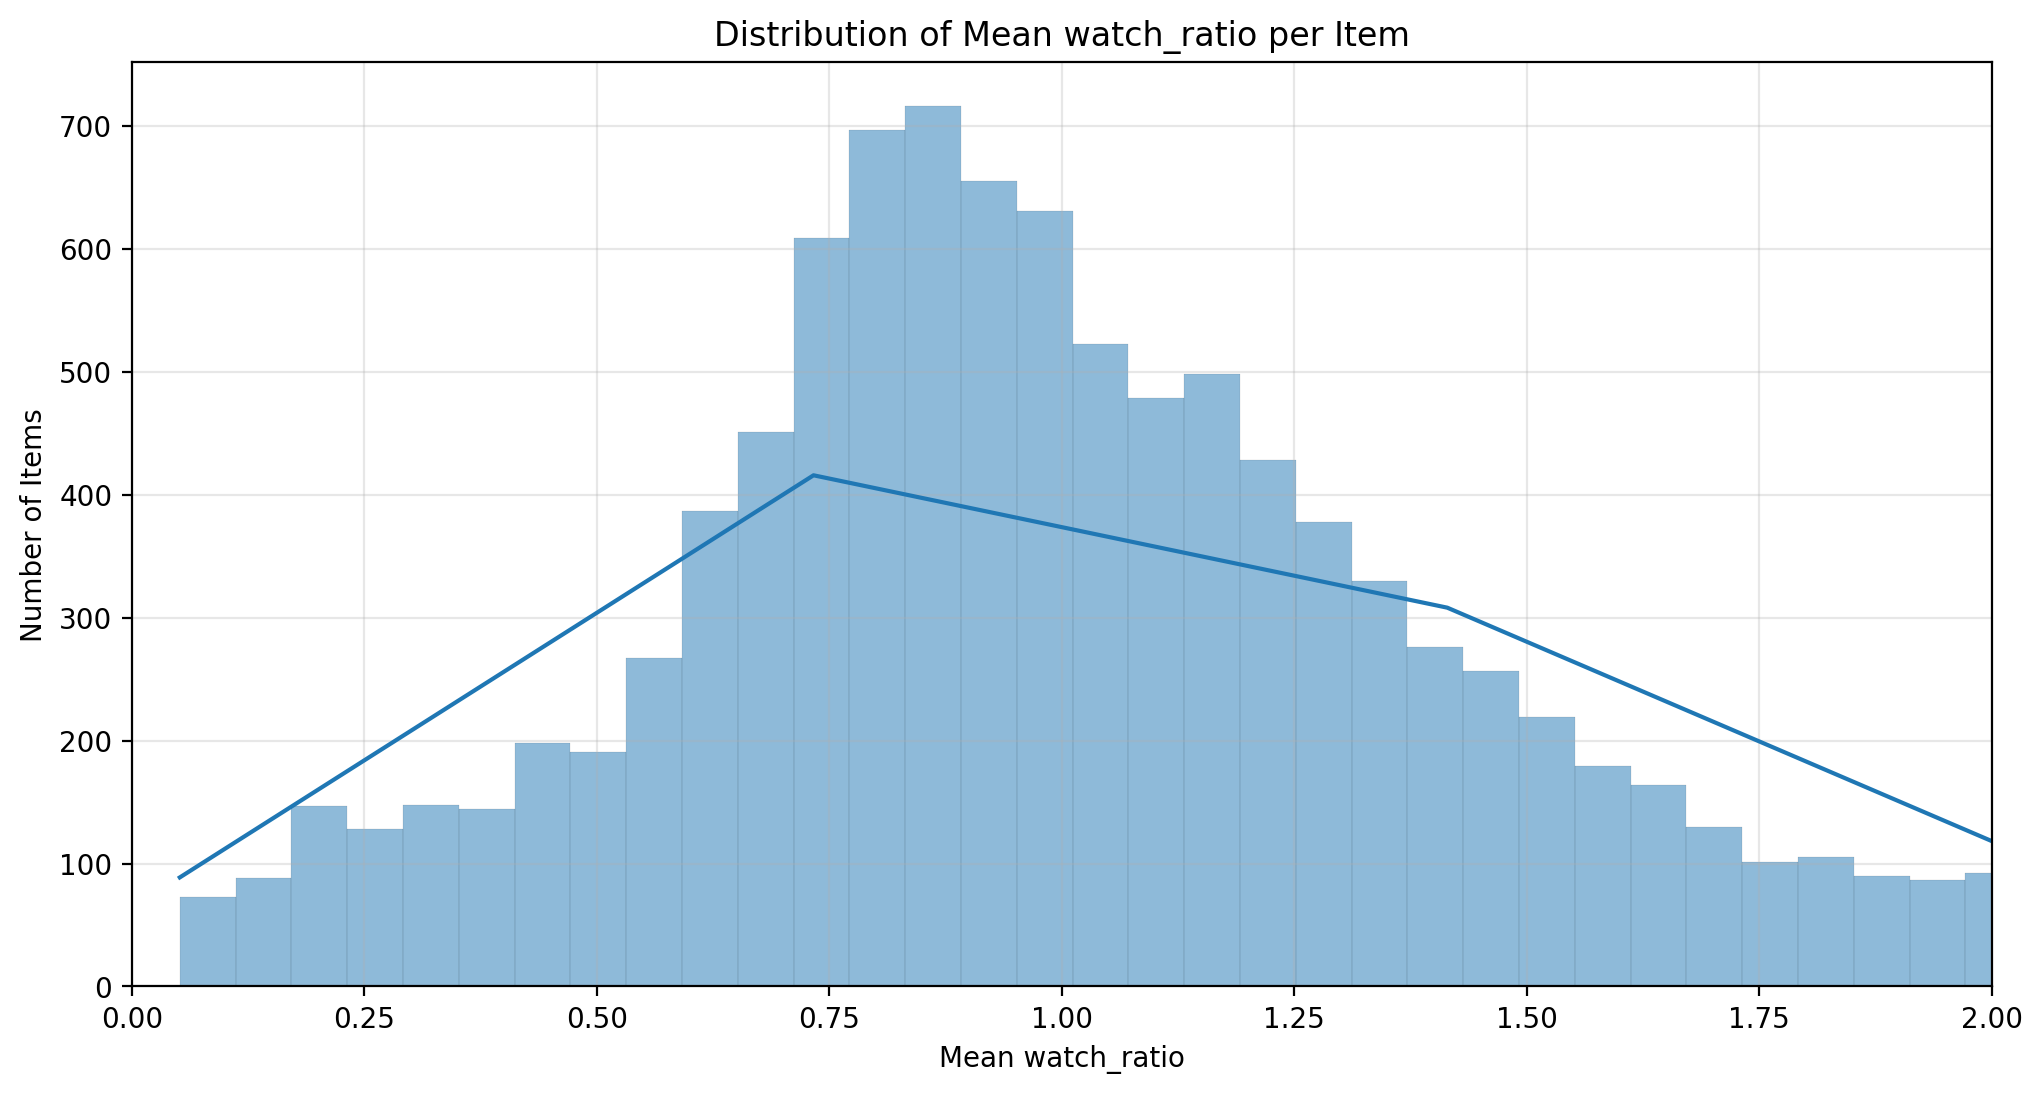

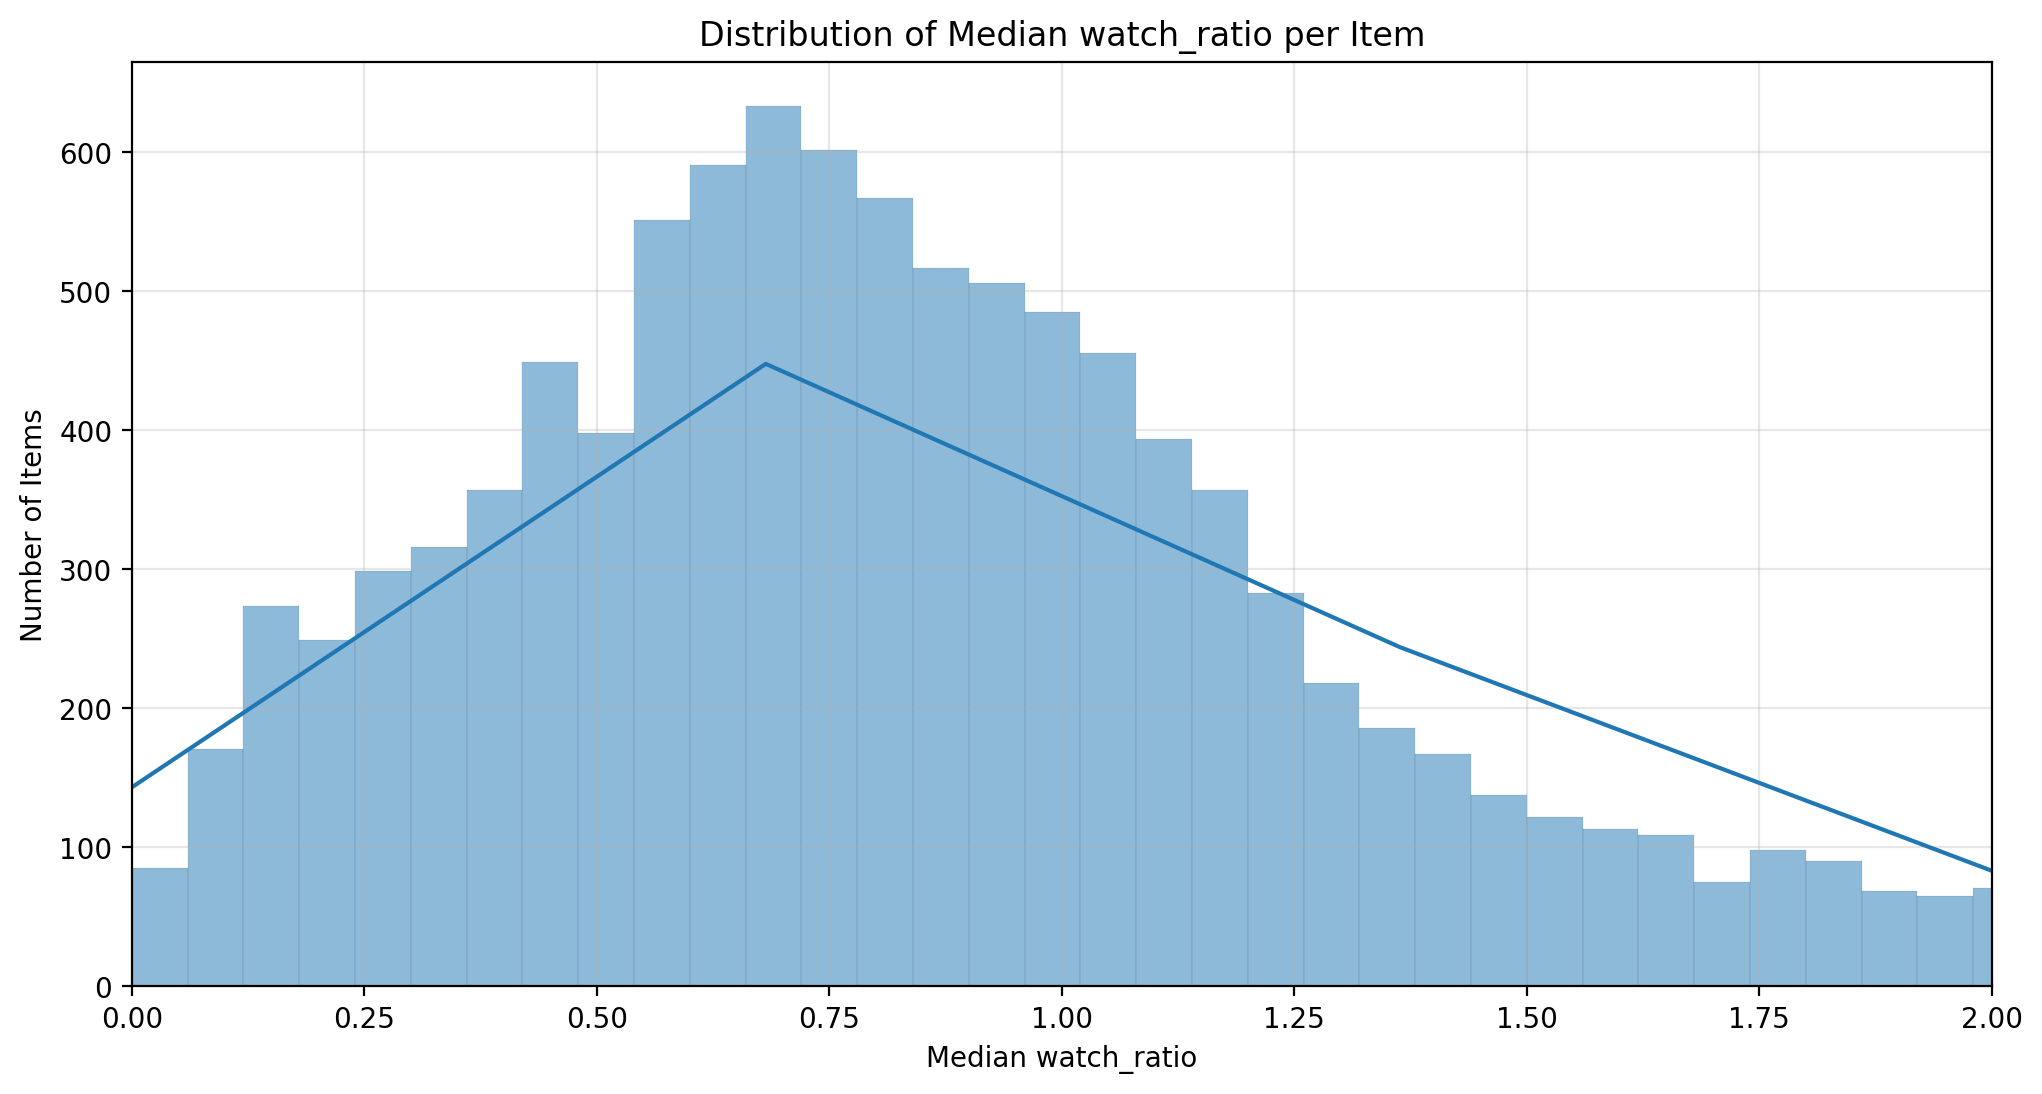

Item Mean watch_ratio Statistics:
count    10728.000000
mean         1.203716
std          2.146068
min          0.051598
25%          0.758687
50%          0.996116
75%          1.350416
max        135.656317
Name: mean, dtype: float64

Item Median watch_ratio Statistics:
count    10728.000000
mean         1.013219
std          2.097529
min          0.000000
25%          0.550572
50%          0.820974
75%          1.165356
max        135.656317
Name: median, dtype: float64


In [ ]:
item_watch_stats = interactions.groupby("video_id")["watch_ratio"].agg(["mean", "median", "std"])

plt.figure(figsize=(12, 6))
sns.histplot(item_watch_stats["mean"], bins=100, kde=True, binwidth=0.06)
plt.title("Distribution of Mean watch_ratio per Item")
plt.xlabel("Mean watch_ratio")
plt.ylabel("Number of Items")
plt.xlim(0, 2)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(item_watch_stats["median"], bins=100, kde=True, binwidth=0.06)
plt.title("Distribution of Median watch_ratio per Item")
plt.xlabel("Median watch_ratio")
plt.ylabel("Number of Items")
plt.grid(True, alpha=0.3)
plt.xlim(0, 2)
plt.show()

print("Item Mean watch_ratio Statistics:")
print(item_watch_stats["mean"].describe())
print("\nItem Median watch_ratio Statistics:")
print(item_watch_stats["median"].describe())


## Result of the Analysis

We will try to answer the questions we asked in the previous section.

- **How many unique users and items are there in the data?**  
  - There are **7,176 unique users** and **10,728 unique videos (items)**.

- **What are the data types present in the dataset?**  
  - The dataset primarily consists of **integers**, with some **floats**, and **timestamps** for time-related data.

- **Are there timestamps, and what is their range?**  
  - Yes, timestamps are present. The **time column ranges from 2020-07-04 to 2020-09-05**, covering a span of **2 months**.

- **How many interactions are there in the data?**  
  - There are **12,530,806 interactions**, corresponding to the number of rows in the dataset.

- **What is the average number of interactions per user?**  
  - On average, each user interacts **1,611.62 times**.  
    The minimum interaction count per user is **94**, and the maximum is **15,283**.

- **What is the average number of interactions per item?**  
  - On average, each item has **1,078.02 interactions**.  
    The minimum is **1**, the maximum is **24,173**, and the **median** is **228**.

- **Describe the distribution of interactions per user and per item.**  
  - The distribution follows a **long-tail pattern**.  
    Most items have **very few interactions**, while a small number of items are **highly popular**.  
    Similarly, most users interact with a **small number of items**, with a few users being **highly active**.

- **Which items are the most popular?**  
  - The IDs of the most popular items are listed in the associated Python cell.  
    These are saved for the analysis of the **`items_daily_features`** dataset.

- **Who are the most active users, and what are their characteristics?**  
  - The IDs of the most active users are listed in the associated Python cell.  
    These are saved for the analysis of the **`user_features`** dataset.

- **What is the average watch_ratio?**  
  - The **average watch_ratio** is **0.95**, with a **median** of **0.72**.  
    Very few interactions have a **watch_ratio higher than 4**, suggesting it may be useful to cap it at that value.

- **Describe the distribution of watch_ratio per user.**  
  - The distribution resembles a **normal distribution**, with a peak around **0.8**.  
    Most users have a **watch_ratio between 0.5 and 1.5**, indicating they tend to either **watch a video entirely or skip it quickly**.  
    The **median watch_ratio per user** distribution is more **skewed to the right**, with a smaller second peak around **0.5**.

- **What is the average watch_ratio per item?**  
  - The distribution of watch_ratio per item is **similar** to that of users.

- **How many interactions have a watch_ratio higher than 1 (watched entirely)?**  
  - **4,237,441 interactions** have a watch_ratio higher than 1, which is **33.8%** of the total.

- **How many interactions have a watch_ratio lower than 0.1 (likely skipped by users)?**  
  - **1,112,309 interactions** have a watch_ratio lower than 0.1, which is **8.9%** of the total.


In [ ]:
interactions.loc[interactions["watch_ratio"] > 5, "watch_ratio"] = 5

interactions["is_weekend"] = interactions["time"].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

## Conclusion

This exploratory analysis provides valuable insights into user behavior and item popularity within the dataset. A few key patterns emerge:

- The **user-item interaction distribution** follows a classic **long-tail pattern**, where a small number of users and items account for the majority of interactions. This suggests a strong imbalance in engagement, which is typical in recommender system datasets.
  
- **User engagement** is relatively high, with an average of over 1,600 interactions per user. However, there's considerable variability, indicating that some users are extremely active while others are more passive.

- The **watch_ratio** is a particularly insightful metric. On average, users watch **most of the video content**, as reflected in the high average (0.95) and the distribution peaking around 0.8. A third of all interactions involved watching the video more than once (watch_ratio > 1), while about 9% indicate likely skips (watch_ratio < 0.1).